# 와인 품질 분석

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier

In [12]:
train=pd.read_csv("./와인품질분류/train.csv",encoding="utf-8")
test=pd.read_csv("./와인품질분류/test.csv",encoding="utf-8")
submission=pd.read_csv("./와인품질분류/sample_submission.csv",encoding="utf-8")

In [15]:
train.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [23]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [24]:
train['type'].unique()

array(['white', 'red'], dtype=object)

In [93]:
# red wine은 0, white wine은 1로 바꾼다
train['type']=train['type'].replace('red',0)
train['type']=train['type'].replace('white',1)
test['type']=test['type'].replace('red',0)
test['type']=test['type'].replace('white',1)

<AxesSubplot:>

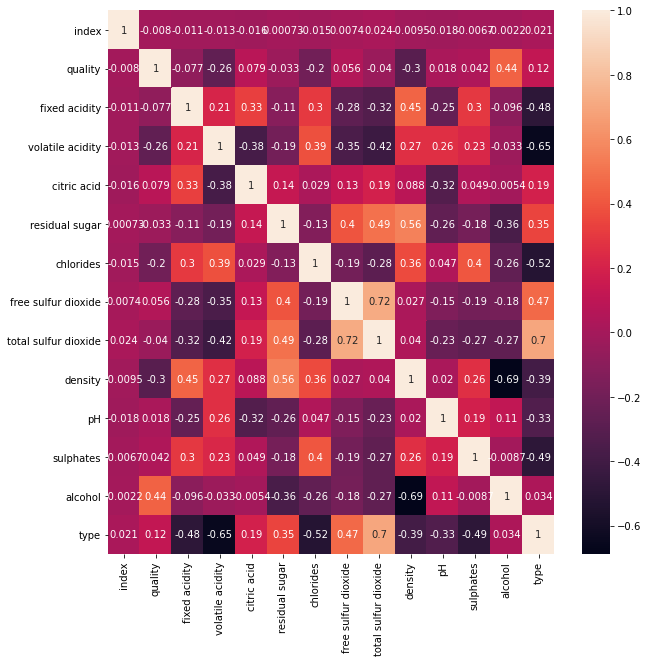

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

<li>type & fixed acidity</li>
<li>type & volatile acidity</li>
<li>type & chlorides</li>
<li>type & free sulfur dioxide</li>
<li>type & total sulfur dioxide</li>
<li>type & sulphates</li>
<li>quality & alcohol</li>
<li>density & alcohol</li>
<li>sulphates & chlorides</li>
<li>density & fixed acidity</li>
<li>density & residual sugar</li>
<li>total sulfur dioxide & residual sugar</li>
<li>free sulfulr dioxide & residual sugar

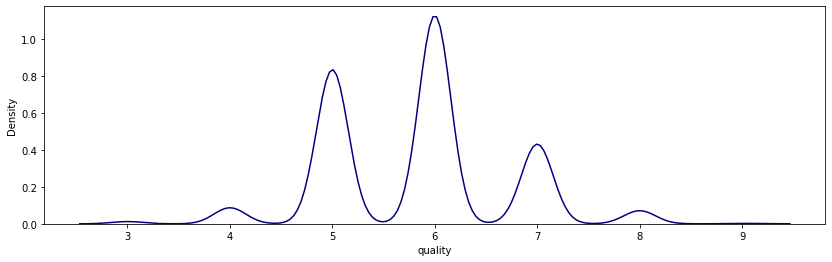

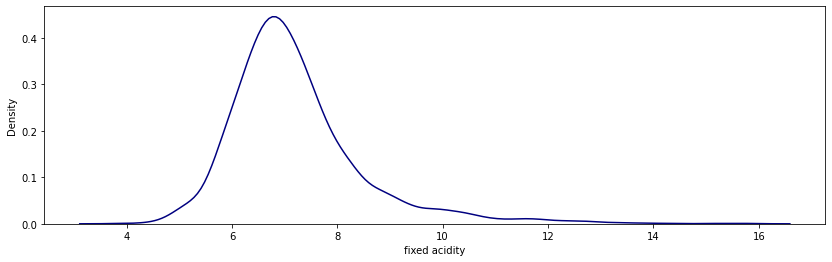

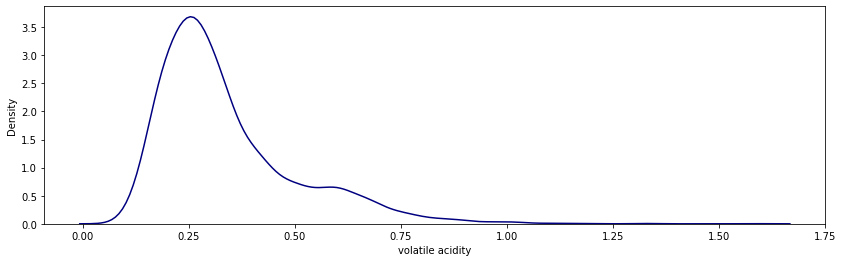

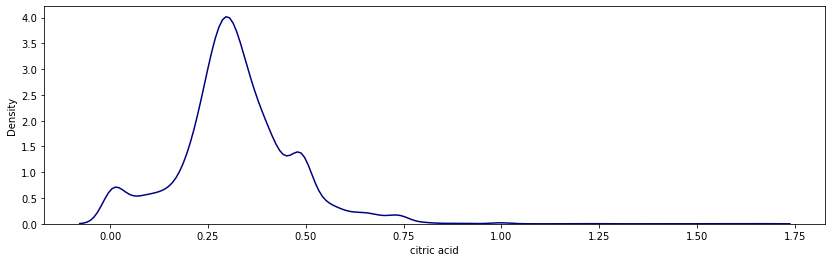

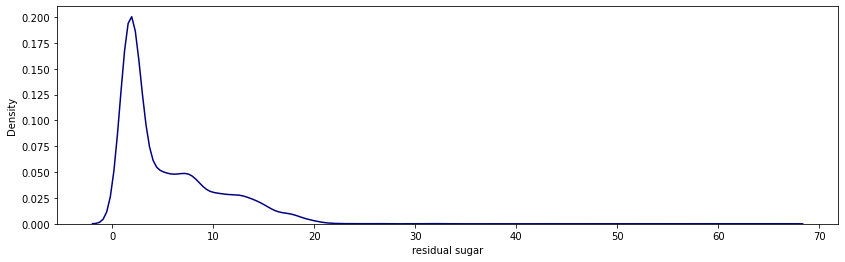

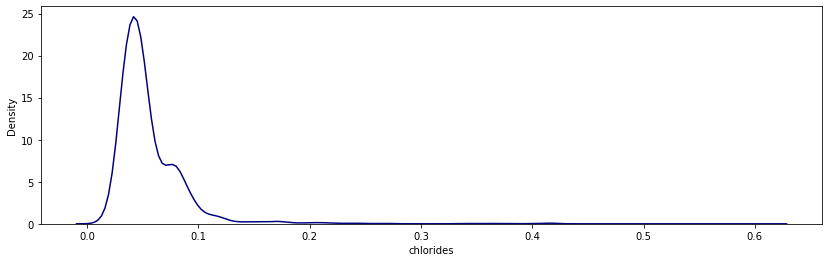

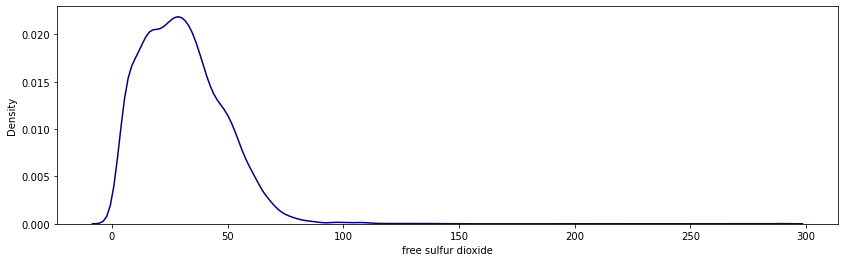

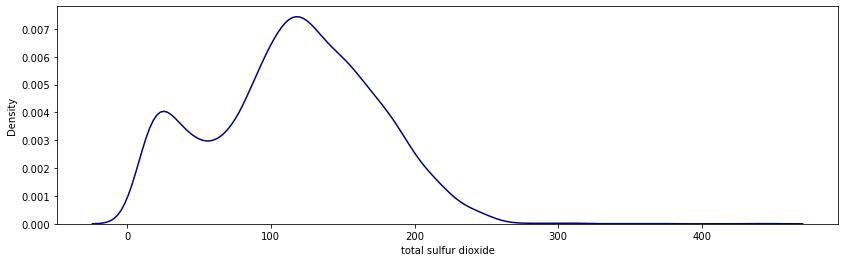

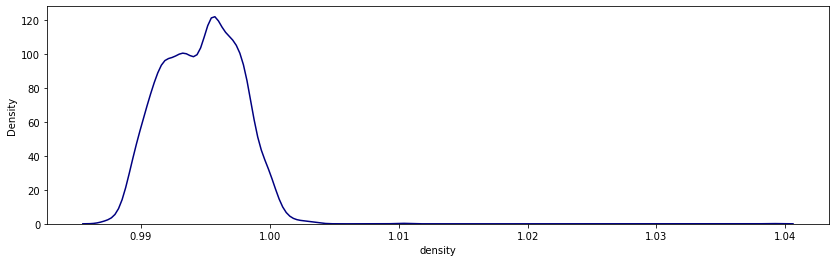

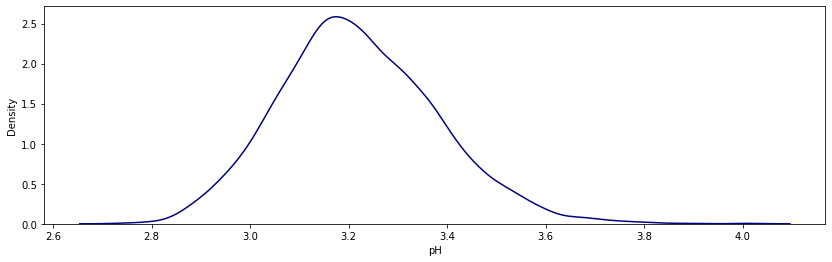

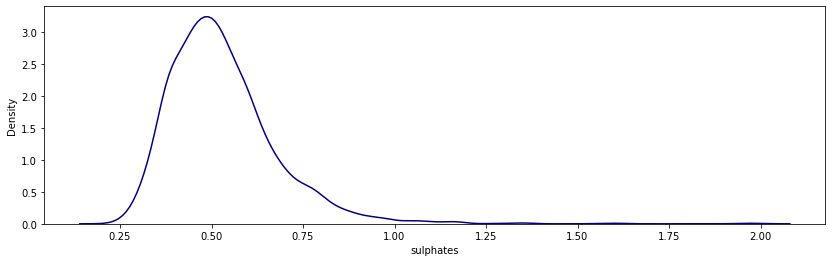

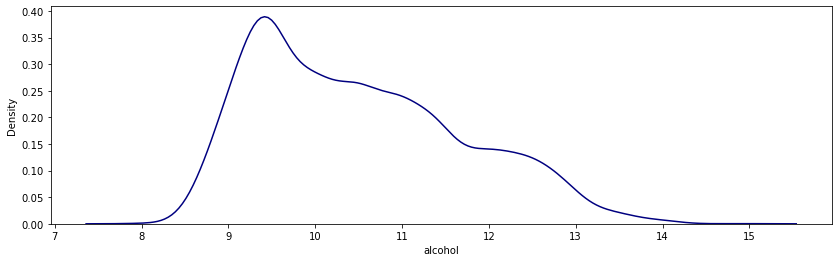

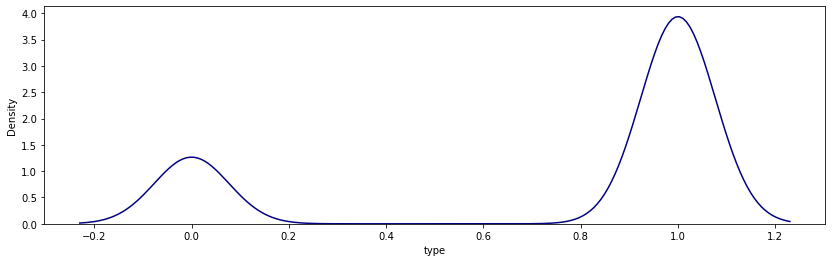

In [45]:
for i in range(1,len(train.columns)):
    plt.figure(figsize=(14,4))
    sns.kdeplot(train.iloc[:,i],color='navy')

In [147]:
ss=StandardScaler()
mm=MinMaxScaler()

In [181]:
new_df.rename(columns={0:'quality'},inplace=True)

In [182]:
new_df['type']=train['type']

In [183]:
new_df.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [184]:
features=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type']
target='quality'

In [197]:
X_train=train[features]
X_test=test[features]
Y_train=train[target]

In [198]:
dtc=DecisionTreeClassifier()

In [199]:
dtc.fit(X_train,Y_train)
dtc.predict(X_test)

array([5, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 6, 7, 7, 6, 5, 6, 6, 6, 6, 6, 6,
       5, 7, 6, 6, 5, 5, 6, 6, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 7, 5, 8, 5,
       6, 7, 6, 6, 4, 6, 5, 5, 6, 4, 5, 5, 6, 7, 5, 5, 5, 6, 5, 4, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 4, 6, 6, 7, 7, 6, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 7, 6, 7, 6, 6, 7, 5, 6, 7, 5, 5, 5, 6, 6, 6, 4, 4,
       6, 5, 5, 8, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 7, 5, 8, 6, 5,
       5, 5, 5, 5, 6, 3, 5, 6, 6, 7, 6, 5, 4, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 5, 6, 7, 6, 5, 4, 6, 6, 5, 7, 6, 4, 5, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 7, 5, 7, 7, 7, 6, 6, 4, 7, 7,
       7, 5, 6, 6, 7, 6, 6, 5, 6, 5, 7, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7, 6,
       6, 4, 7, 6, 6, 7, 5, 6, 5, 6, 7, 6, 5, 6, 6, 8, 7, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 7, 6, 7, 8, 6, 5, 7, 7,

<AxesSubplot:ylabel='Density'>

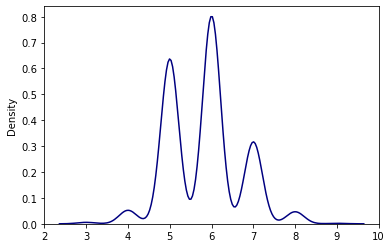

In [200]:
sns.kdeplot(dtc.predict(X_test),color='navy')

In [193]:
for i in range(1,len(train.columns)-1):
    temp=train.iloc[:,i].to_frame(name='{0}'.format(train.columns[i]))
    temp_transform=ss.fit_transform(temp)
    if i == 1:
        new_df=pd.DataFrame(temp_transform)
    else:
        new_df['{0}'.format(train.columns[i])]=pd.DataFrame(temp_transform)

<AxesSubplot:ylabel='Density'>

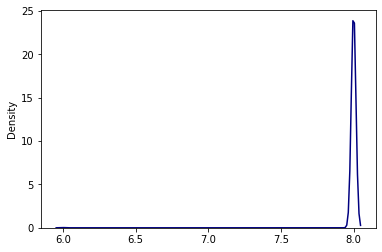

In [196]:
new_df['type']=train['type']
X_train=new_df[features]
X_test=test[features]
Y_train=train[target]
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.predict(X_test)
sns.kdeplot(dtc.predict(X_test),color='navy')

In [129]:
new_df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-0.941120,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,-0.941120,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,-0.941120,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,0.208000,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,0.208000,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,-0.941120,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,1
5493,0.208000,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,1
5494,1.357119,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,1
5495,-0.941120,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,1


In [132]:
lgb=LGBMClassifier(n_estimators=400)

In [202]:
X_train=train[features]
X_test=test[features]
Y_train=train[target]
lgb.fit(X_train,Y_train)
result=lgb.predict(X_test)

<AxesSubplot:ylabel='Density'>

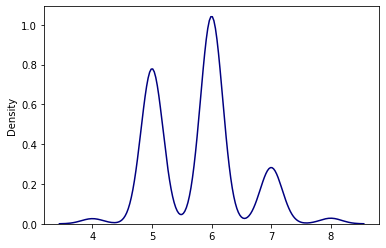

In [203]:
sns.kdeplot(pd.Series(result),color='navy')

In [140]:
submission_result=submission.copy()

In [142]:
submission_result['quality']=result

In [145]:
submission_result.to_csv("submission.csv",index=False)

In [207]:
for i in range(1,len(train.columns)-1):
    temp=train.iloc[:,i].to_frame(name='{0}'.format(train.columns[i]))
    temp_transform=mm.fit_transform(temp)
    if i == 1:
        new_df=pd.DataFrame(temp_transform)
    else:
        new_df['{0}'.format(train.columns[i])]=pd.DataFrame(temp_transform)

In [208]:
new_df['type']=train['type']
X_train=new_df[features]
X_test=test[features]
Y_train=train[target]
dmt.fit(X_train,Y_train)
result=dmt.predict(X_test)
submission_result=submission.copy()
submission_result['quality']=result
submission_result.to_csv("submission.csv",index=False)

In [209]:
result

array([7, 5, 8, 7, 8, 7, 5, 7, 8, 7, 7, 7, 8, 8, 8, 5, 7, 7, 8, 5, 5, 8,
       8, 7, 7, 5, 8, 5, 7, 5, 8, 8, 5, 5, 7, 7, 5, 7, 8, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 8, 7, 7, 5, 7, 5, 5, 7, 8, 7, 8, 5, 5, 7, 5, 7, 5, 7,
       7, 7, 7, 5, 5, 5, 8, 5, 7, 5, 8, 7, 7, 8, 5, 7, 8, 8, 7, 5, 7, 7,
       7, 7, 7, 7, 5, 5, 5, 5, 7, 7, 8, 7, 5, 7, 8, 5, 5, 5, 5, 7, 8, 7,
       5, 7, 7, 7, 8, 7, 7, 7, 5, 7, 7, 5, 7, 5, 8, 8, 8, 7, 8, 5, 7, 5,
       5, 5, 7, 5, 7, 7, 8, 7, 5, 7, 8, 7, 8, 8, 8, 7, 7, 7, 8, 7, 5, 5,
       7, 5, 5, 7, 7, 5, 8, 7, 7, 7, 8, 8, 8, 8, 8, 5, 7, 8, 7, 5, 7, 8,
       7, 8, 7, 5, 7, 5, 5, 7, 5, 5, 7, 8, 8, 7, 8, 7, 7, 8, 7, 5, 8, 7,
       7, 8, 7, 7, 8, 5, 7, 8, 8, 8, 5, 7, 8, 8, 7, 7, 7, 5, 7, 8, 7, 7,
       7, 7, 8, 7, 7, 8, 5, 5, 7, 8, 8, 7, 7, 7, 7, 7, 8, 8, 7, 5, 7, 7,
       8, 5, 7, 7, 5, 7, 7, 8, 7, 7, 7, 5, 7, 7, 6, 7, 7, 7, 7, 8, 7, 7,
       5, 5, 6, 7, 7, 7, 7, 7, 8, 5, 7, 8, 7, 7, 7, 5, 8, 5, 5, 8, 7, 5,
       8, 7, 5, 7, 5, 5, 5, 8, 5, 7, 8, 5, 7, 7, 7,

<AxesSubplot:ylabel='Density'>

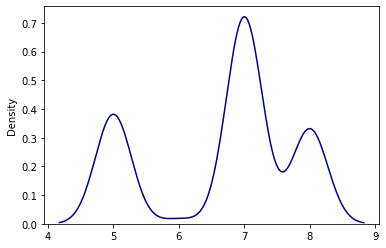

In [210]:
sns.kdeplot(pd.Series(result),color='navy')

In [162]:
rs=RobustScaler()
for i in range(1,len(train.columns)-1):
    temp=train.iloc[:,i].to_frame(name='{0}'.format(train.columns[i]))
    temp_transform=rs.fit_transform(temp)
    if i == 1:
        new_df=pd.DataFrame(temp_transform)
    else:
        new_df['{0}'.format(train.columns[i])]=pd.DataFrame(temp_transform)
new_df['type']=train['type']
X_train=new_df[features]
X_test=test[features]
Y_train=train[target]
dmt.fit(X_train,Y_train)
result=dmt.predict(X_test)

<AxesSubplot:ylabel='Density'>

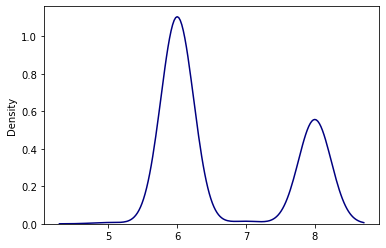

In [168]:
sns.kdeplot(pd.Series(result),color='navy')